## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

In [9]:
import pandas as pd
from io import StringIO
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("target distribution: ", app_y.value_counts())


app_X.describe()


num observations:  106
target distribution:  Class
0    85
1    21
Name: count, dtype: int64


,At1,At2,At3,At4,At5,At6,At7
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.398491,0.682104,0.415151,0.208745,0.169151,0.676349,0.375396
std,0.191452,0.207134,0.205799,0.199650,0.177329,0.218909,0.198132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244750,0.589000,0.277000,0.056000,0.049250,0.576000,0.238000
50%,0.413000,0.750000,0.442500,0.146000,0.113000,0.744000,0.397500
75%,0.505750,0.821000,0.545500,0.302500,0.226750,0.831250,0.486750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='RSS')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''


discretization thresholds
num of features:  7
Categorical []
# 0  GLOBAL CAIM  41.18488372093023
# 1  GLOBAL CAIM  39.99669148056245
# 2  GLOBAL CAIM  41.745054945054946
# 3  GLOBAL CAIM  35.090659340659336
# 4  GLOBAL CAIM  37.25892316999395
# 5  GLOBAL CAIM  38.4981684981685
# 6  GLOBAL CAIM  41.83013879709187

thresholds  {'At1': [0.0, 0.213, 2.0], 'At2': [0.0, 0.411, 2.0], 'At3': [0.0, 0.153, 2.0], 'At4': [0.0, 0.056, 2.0], 'At5': [0.0, 0.029, 2.0], 'At6': [0.0, 0.421, 2.0], 'At7': [0.0, 0.145, 2.0]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding

model
ML best parameters:  {'C': 10.0}
ML best alpha:  0.1
ML weights:
          Feature    Weight
0   featAt1-bin1  1.434741
1   featAt1-bin2 -0.618188
2   featAt1-bin3  0.000000
3   featAt2-bin1  0.376112
4   featAt2-bin2 -0.396018
5   featAt2-bin3  0.000000
6   featAt3-bin1  0.000000
7   featAt3-bin2 -0.338341
8   featAt3-bin3  0.000000
9   featAt4-bin1  1.153659
10  featAt4-bin2 -0.834330
11  f

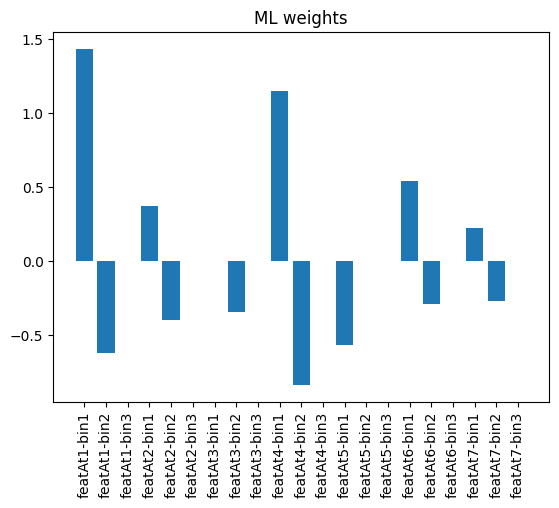

num of zero weights:  9
num of non-zero weights:  12
         Feature    Weight
0   featAt1-bin1  1.434741
1   featAt1-bin2 -0.618188
3   featAt2-bin1  0.376112
4   featAt2-bin2 -0.396018
7   featAt3-bin2 -0.338341
9   featAt4-bin1  1.153659
10  featAt4-bin2 -0.834330
12  featAt5-bin1 -0.567629
15  featAt6-bin1  0.543265
16  featAt6-bin2 -0.287253
18  featAt7-bin1  0.227703
19  featAt7-bin2 -0.266390


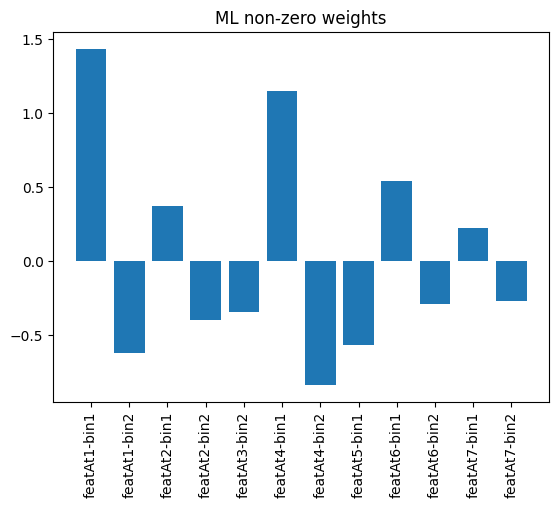

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.0, 0.2, 0.3, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.7272727272727273, 0.9090909090909091, 0.9090909090909091, 1.0, 0.8, 0.7, 0.8]
AUCs:  [0.8333333333333333, 0.9444444444444444, 1.0, 0.5, 0.9444444444444444, 0.5, 1.0, 0.875, 0.625, 0.875]
mean MSE:  0.14272727272727273
mean accuracy:  0.8572727272727272
mean AUC:  0.8097222222222221
Execution time: 0.27466440200805664 seconds


In [10]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [11]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 12



discretization thresholds

thresholds  {'At1': [0.0135, 0.0425, 0.06, 0.0665, 0.07999999999999999, 0.0935, 0.1, 0.109, 0.118, 0.131, 0.16449999999999998, 0.189, 0.1955, 0.202, 0.2085, 0.2155, 0.22, 0.2265, 0.23349999999999999, 0.2535, 0.27749999999999997, 0.291, 0.3, 0.311, 0.3245, 0.33999999999999997, 0.3555, 0.362, 0.3665, 0.371, 0.3755, 0.3845, 0.3935, 0.398, 0.40449999999999997, 0.411, 0.4155, 0.42, 0.4245, 0.429, 0.4355, 0.4445, 0.451, 0.4555, 0.46, 0.4645, 0.469, 0.4755, 0.4845, 0.491, 0.4975, 0.5045, 0.509, 0.5135000000000001, 0.518, 0.522, 0.531, 0.547, 0.5645, 0.58, 0.589, 0.602, 0.6174999999999999, 0.6245, 0.6445000000000001, 0.671, 0.682, 0.7175, 0.7575000000000001, 0.771, 0.787, 0.8400000000000001, 0.942], 'At2': [0.0805, 0.16999999999999998, 0.1875, 0.20500000000000002, 0.223, 0.241, 0.259, 0.2945, 0.33899999999999997, 0.366, 0.393, 0.42, 0.4465, 0.473, 0.491, 0.509, 0.536, 0.5625, 0.58, 0.598, 0.616, 0.634, 0.652, 0.67, 0.6965, 0.723, 0.741, 0.759, 0.777, 0.795, 0.8125, 

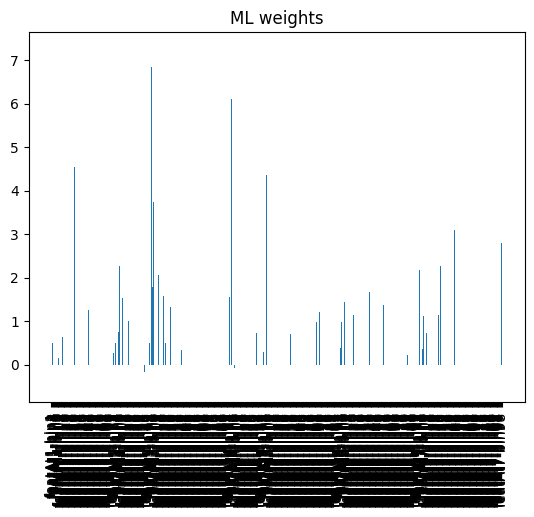

num of zero weights:  460
num of non-zero weights:  63
           Feature    Weight
1     featAt1-bin2  0.491072
4     featAt1-bin5  0.714921
8     featAt1-bin9  0.153758
10   featAt1-bin11  7.254125
13   featAt1-bin14  0.641784
..             ...       ...
449  featAt7-bin25  1.130233
451  featAt7-bin27  2.264632
467  featAt7-bin43  3.101366
468  featAt7-bin44  0.336830
522  featAt7-bin98  2.789774

[63 rows x 2 columns]


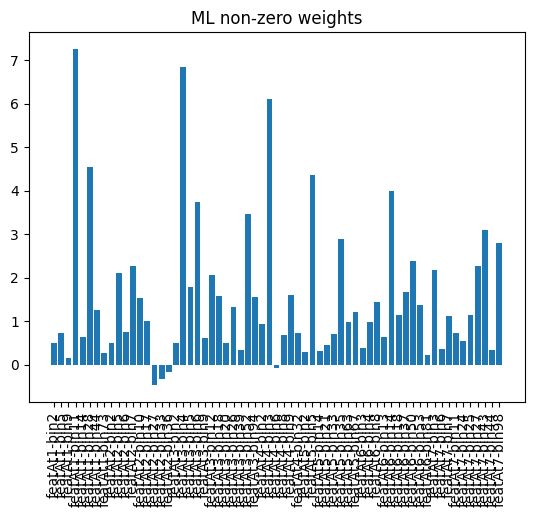

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.0, 0.2, 0.3, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.7272727272727273, 0.9090909090909091, 0.9090909090909091, 1.0, 0.8, 0.7, 0.8]
AUCs:  [0.8333333333333333, 0.9444444444444444, 1.0, 0.5, 0.9444444444444444, 0.5, 1.0, 0.875, 0.625, 0.875]
mean MSE:  0.14272727272727273
mean accuracy:  0.8572727272727272
mean AUC:  0.8097222222222221
Execution time: 1.27569580078125 seconds


In [12]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  7
Categorical []
# 0  GLOBAL CAIM  41.18488372093023
# 1  GLOBAL CAIM  39.99669148056245
# 2  GLOBAL CAIM  41.745054945054946
# 3  GLOBAL CAIM  35.090659340659336
# 4  GLOBAL CAIM  37.25892316999395
# 5  GLOBAL CAIM  38.4981684981685
# 6  GLOBAL CAIM  41.83013879709187

thresholds  {'At1': [0.0, 0.213, 2.0], 'At2': [0.0, 0.411, 2.0], 'At3': [0.0, 0.153, 2.0], 'At4': [0.0, 0.056, 2.0], 'At5': [0.0, 0.029, 2.0], 'At6': [0.0, 0.421, 2.0], 'At7': [0.0, 0.145, 2.0]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding

model
ML best parameters:  {'C': 10.0}
ML best alpha:  0.1
ML weights:
          Feature    Weight
0   featAt1-bin1  0.667367
1   featAt1-bin2 -2.046308
2   featAt1-bin3  0.000000
3   featAt2-bin1  0.561113
4   featAt2-bin2 -0.748838
5   featAt2-bin3  0.000000
6   featAt3-bin1  0.336540
7   featAt3-bin2 -0.266861
8   featAt3-bin3  0.000000
9   featAt4-bin1  0.210496
10  featAt4-bin2 -1.939328
11  f

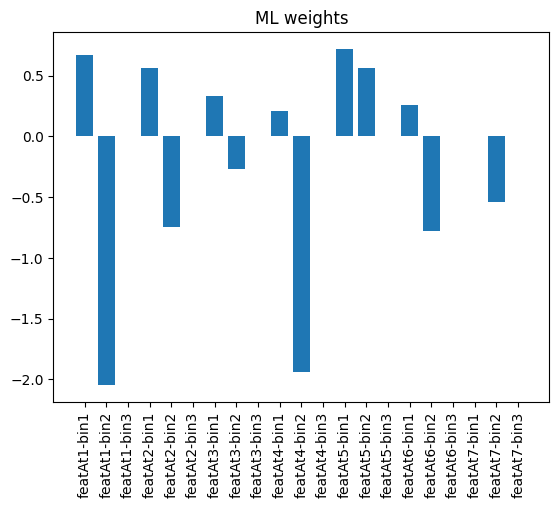

num of zero weights:  7
num of non-zero weights:  14
         Feature    Weight
0   featAt1-bin1  0.667367
1   featAt1-bin2 -2.046308
3   featAt2-bin1  0.561113
4   featAt2-bin2 -0.748838
6   featAt3-bin1  0.336540
7   featAt3-bin2 -0.266861
9   featAt4-bin1  0.210496
10  featAt4-bin2 -1.939328
12  featAt5-bin1  0.720224
13  featAt5-bin2  0.566335
15  featAt6-bin1  0.257768
16  featAt6-bin2 -0.779332
18  featAt7-bin1  0.002484
19  featAt7-bin2 -0.538897


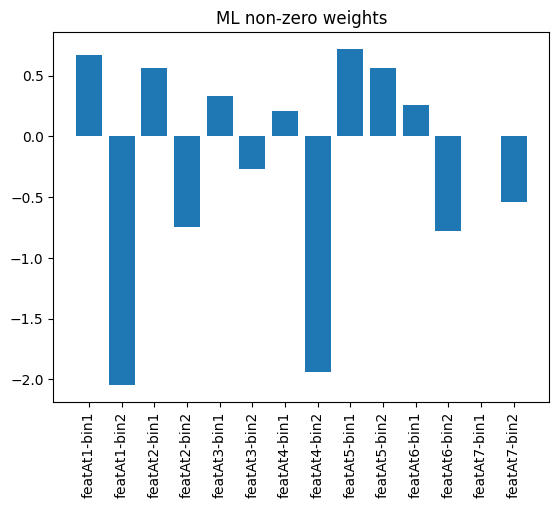

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.0, 0.2, 0.3, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.7272727272727273, 0.9090909090909091, 0.9090909090909091, 1.0, 0.8, 0.7, 0.8]
AUCs:  [0.8333333333333333, 0.9444444444444444, 1.0, 0.5, 0.9444444444444444, 0.5, 1.0, 0.875, 0.625, 0.875]
mean MSE:  0.14272727272727273
mean accuracy:  0.8572727272727272
mean AUC:  0.8097222222222221
Execution time: 0.2872447967529297 seconds


In [13]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [14]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 14



discretization thresholds

thresholds  {'At1': [0.0135, 0.0425, 0.06, 0.0665, 0.07999999999999999, 0.0935, 0.1, 0.109, 0.118, 0.131, 0.16449999999999998, 0.189, 0.1955, 0.202, 0.2085, 0.2155, 0.22, 0.2265, 0.23349999999999999, 0.2535, 0.27749999999999997, 0.291, 0.3, 0.311, 0.3245, 0.33999999999999997, 0.3555, 0.362, 0.3665, 0.371, 0.3755, 0.3845, 0.3935, 0.398, 0.40449999999999997, 0.411, 0.4155, 0.42, 0.4245, 0.429, 0.4355, 0.4445, 0.451, 0.4555, 0.46, 0.4645, 0.469, 0.4755, 0.4845, 0.491, 0.4975, 0.5045, 0.509, 0.5135000000000001, 0.518, 0.522, 0.531, 0.547, 0.5645, 0.58, 0.589, 0.602, 0.6174999999999999, 0.6245, 0.6445000000000001, 0.671, 0.682, 0.7175, 0.7575000000000001, 0.771, 0.787, 0.8400000000000001, 0.942], 'At2': [0.0805, 0.16999999999999998, 0.1875, 0.20500000000000002, 0.223, 0.241, 0.259, 0.2945, 0.33899999999999997, 0.366, 0.393, 0.42, 0.4465, 0.473, 0.491, 0.509, 0.536, 0.5625, 0.58, 0.598, 0.616, 0.634, 0.652, 0.67, 0.6965, 0.723, 0.741, 0.759, 0.777, 0.795, 0.8125, 

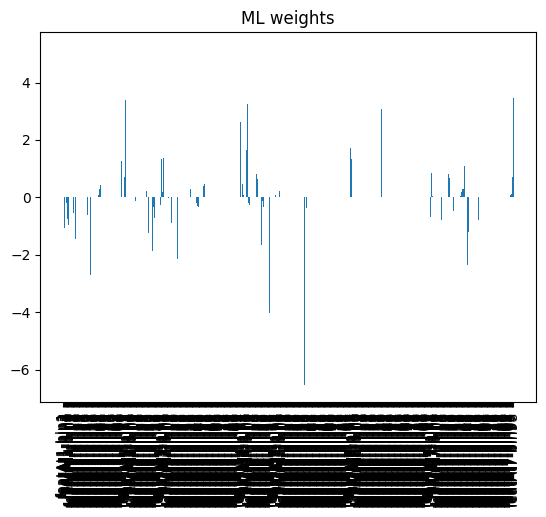

num of zero weights:  420
num of non-zero weights:  103
           Feature    Weight
2     featAt1-bin3 -1.051641
4     featAt1-bin5 -0.189239
5     featAt1-bin6 -0.742261
6     featAt1-bin7 -0.969992
7     featAt1-bin8  0.024714
..             ...       ...
482  featAt7-bin58 -0.794063
519  featAt7-bin95  0.077425
520  featAt7-bin96  0.128542
521  featAt7-bin97  0.698903
522  featAt7-bin98  3.444129

[103 rows x 2 columns]


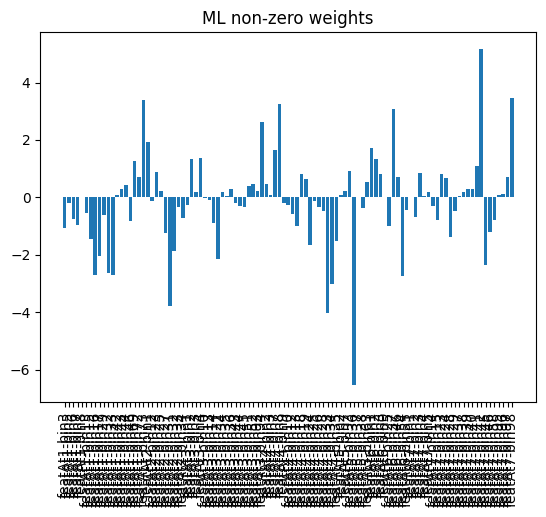

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.0, 0.2, 0.2, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.8181818181818182, 0.9090909090909091, 0.9090909090909091, 1.0, 0.8, 0.8, 0.8]
AUCs:  [0.8333333333333333, 0.9444444444444444, 1.0, 0.5555555555555556, 0.9444444444444444, 0.5, 1.0, 0.875, 0.6875, 0.875]
mean MSE:  0.12363636363636363
mean accuracy:  0.8763636363636363
mean AUC:  0.8215277777777779
Execution time: 1.359095811843872 seconds


In [15]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## mammographic masses
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

In [16]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations: ", mammo_y.count())
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

num observations:  Severity    961
dtype: int64
num rows with nulls:  162
num observations:  830
target distribution:  Severity
0    427
1    403
Name: count, dtype: int64


,BI-RADS,Age,Shape,Margin,Density
count,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663
std,1.888371,14.671782,1.242361,1.567175,0.350936
min,0.000000,18.000000,1.000000,1.000000,1.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000



discretization thresholds
num of features:  5
Categorical []
# 0  GLOBAL CAIM  285.6742136527413
# 1  GLOBAL CAIM  200.56837074465608
# 2  GLOBAL CAIM  253.01568742655698
# 3  GLOBAL CAIM  248.36477272046983
# 4  GLOBAL CAIM  110.57423563701806

thresholds  {'BI-RADS': [0.0, 4.0, 56.0], 'Age': [18.0, 57.0, 97.0], 'Shape': [1.0, 2.0, 5.0], 'Margin': [1.0, 2.0, 6.0], 'Density': [1.0, 2.0, 5.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding

model
ML best parameters:  {'C': 1000.0}
ML best alpha:  0.001
ML weights:
              Feature    Weight
0   featBI-RADS-bin1 -1.214173
1   featBI-RADS-bin2 -0.106214
2   featBI-RADS-bin3  0.000000
3       featAge-bin1 -0.203943
4       featAge-bin2  0.889941
5       featAge-bin3  0.000000
6     featShape-bin1 -0.065169
7     featShape-bin2  0.298785
8     featShape-bin3  0.000000
9    featMargin-bin1 -2.104198
10   featMargin-bin2  0.457940
11   featMargin-bin3  0.000000
12  featDensity-bin1  1.435942
13  featDe

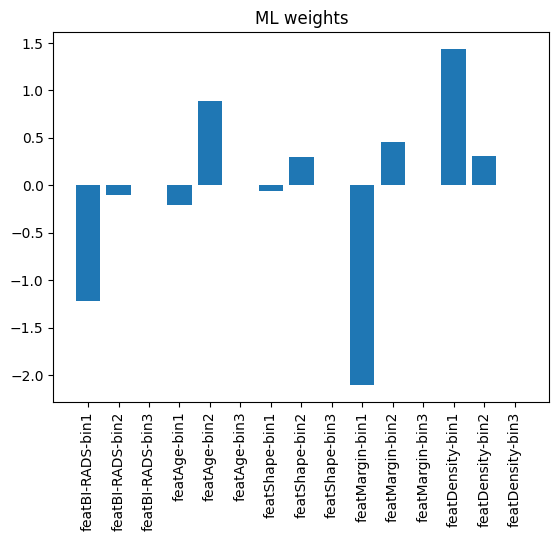

num of zero weights:  5
num of non-zero weights:  10
             Feature    Weight
0   featBI-RADS-bin1 -1.214173
1   featBI-RADS-bin2 -0.106214
3       featAge-bin1 -0.203943
4       featAge-bin2  0.889941
6     featShape-bin1 -0.065169
7     featShape-bin2  0.298785
9    featMargin-bin1 -2.104198
10   featMargin-bin2  0.457940
12  featDensity-bin1  1.435942
13  featDensity-bin2  0.306451


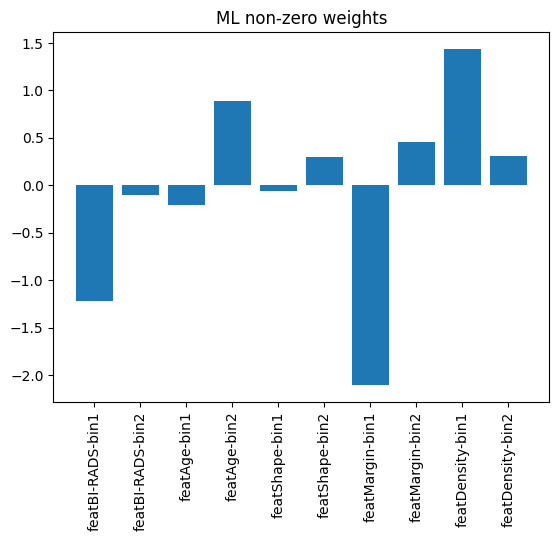

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.1927710843373494, 0.12048192771084337, 0.21686746987951808, 0.1566265060240964, 0.24096385542168675, 0.10843373493975904, 0.25301204819277107]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8072289156626506, 0.8795180722891566, 0.7831325301204819, 0.8433734939759037, 0.7590361445783133, 0.891566265060241, 0.7469879518072289]
AUCs:  [0.7976190476190477, 0.9216027874564461, 0.9465737514518002, 0.9290697674418604, 0.9340116279069769, 0.8531976744186046, 0.9311046511627906, 0.8953488372093023, 0.936046511627907, 0.8508720930232558]
mean MSE:  0.1783132530120482
mean accuracy:  0.8216867469879519
mean AUC:  0.8995446749317992
Execution time: 0.38344717025756836 seconds


In [17]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [18]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 10



discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 90.5, 94.5], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 72
  Shape: 4
  Margin: 5
  Density: 4

encoding

model
ML best parameters:  {'C': 1.6666666666666667}
ML best alpha:  0.6
ML weights:
              Feature    Weight
0   featBI-RADS-bin1 -1.631661
1   featBI-RADS-bin2 -1.148379
2   featBI-RADS-bin3 -1.004201
3   featBI-RADS-bin4  1.596233
4   featBI-RADS-bin5  0.562107
..               ...       ...
82   fe

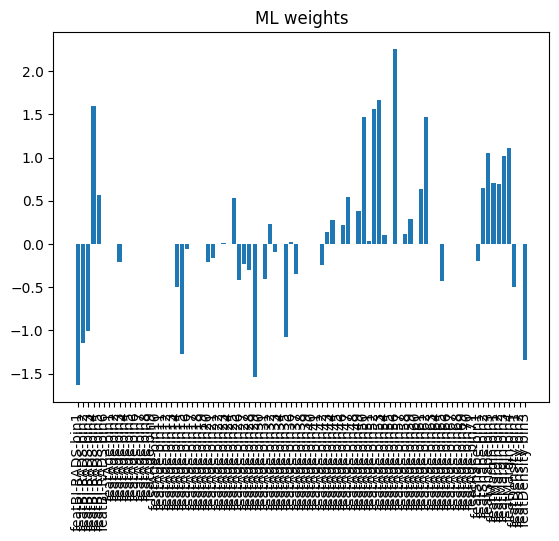

num of zero weights:  38
num of non-zero weights:  49
             Feature    Weight
0   featBI-RADS-bin1 -1.631661
1   featBI-RADS-bin2 -1.148379
2   featBI-RADS-bin3 -1.004201
3   featBI-RADS-bin4  1.596233
4   featBI-RADS-bin5  0.562107
8       featAge-bin3 -0.203774
19     featAge-bin14 -0.500812
20     featAge-bin15 -1.276756
21     featAge-bin16 -0.061356
25     featAge-bin20 -0.204206
26     featAge-bin21 -0.161719
28     featAge-bin23  0.008272
30     featAge-bin25  0.538241
31     featAge-bin26 -0.411909
32     featAge-bin27 -0.231664
33     featAge-bin28 -0.304044
34     featAge-bin29 -1.535076
36     featAge-bin31 -0.405432
37     featAge-bin32  0.235908
38     featAge-bin33 -0.090787
40     featAge-bin35 -1.075518
41     featAge-bin36  0.017550
42     featAge-bin37 -0.345652
47     featAge-bin42 -0.242005
48     featAge-bin43  0.143297
49     featAge-bin44  0.281818
51     featAge-bin46  0.218476
52     featAge-bin47  0.543576
54     featAge-bin49  0.382225
55     featAge-b

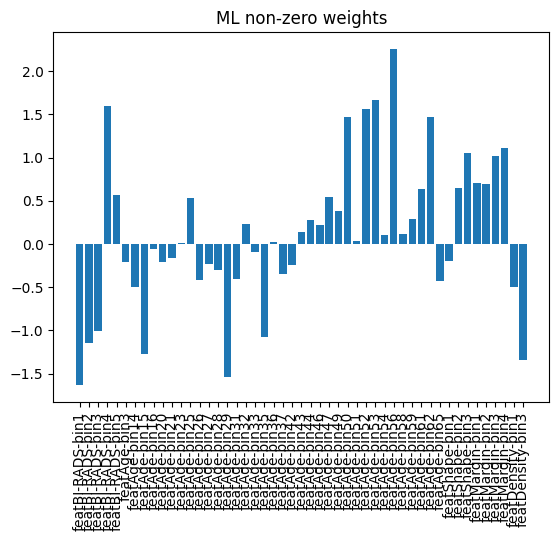

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.18072289156626506, 0.12048192771084337, 0.21686746987951808, 0.14457831325301204, 0.24096385542168675, 0.10843373493975904, 0.2289156626506024]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8192771084337349, 0.8795180722891566, 0.7831325301204819, 0.8554216867469879, 0.7590361445783133, 0.891566265060241, 0.7710843373493976]
AUCs:  [0.7923925667828108, 0.921602787456446, 0.9494773519163763, 0.9267441860465117, 0.9340116279069767, 0.8537790697674419, 0.929360465116279, 0.8941860465116278, 0.9418604651162791, 0.8497093023255814]
mean MSE:  0.17349397590361446
mean accuracy:  0.8265060240963857
mean AUC:  0.8993123868946332
Execution time: 0.9517650604248047 seconds


In [19]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
mammo_infbins_1ook_ml_model, mammo_infbins_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  5
Categorical []
# 0  GLOBAL CAIM  285.6742136527413
# 1  GLOBAL CAIM  200.56837074465608
# 2  GLOBAL CAIM  253.01568742655698
# 3  GLOBAL CAIM  248.36477272046983
# 4  GLOBAL CAIM  110.57423563701806

thresholds  {'BI-RADS': [0.0, 4.0, 56.0], 'Age': [18.0, 57.0, 97.0], 'Shape': [1.0, 2.0, 5.0], 'Margin': [1.0, 2.0, 6.0], 'Density': [1.0, 2.0, 5.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding

model
ML best parameters:  {'C': 1000.0}
ML best alpha:  0.001
ML weights:
              Feature    Weight
0   featBI-RADS-bin1 -1.047925
1   featBI-RADS-bin2  1.108228
2   featBI-RADS-bin3  0.000000
3       featAge-bin1 -0.273831
4       featAge-bin2  1.093878
5       featAge-bin3  0.000000
6     featShape-bin1 -0.519911
7     featShape-bin2  0.363850
8     featShape-bin3  0.000000
9    featMargin-bin1 -0.423663
10   featMargin-bin2  2.562028
11   featMargin-bin3  0.000000
12  featDensity-bin1 -0.175529
13  featDe

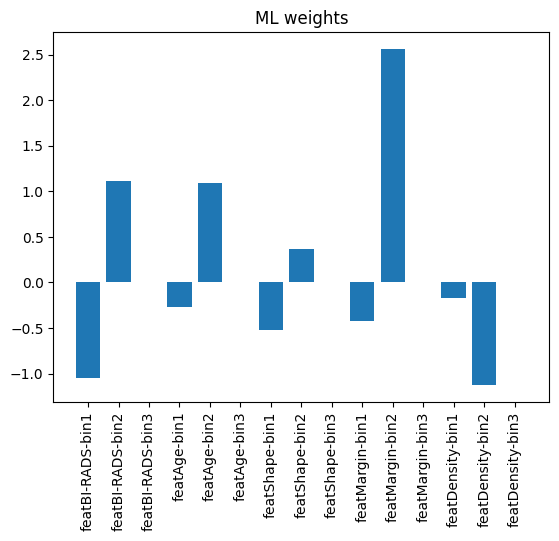

num of zero weights:  5
num of non-zero weights:  10
             Feature    Weight
0   featBI-RADS-bin1 -1.047925
1   featBI-RADS-bin2  1.108228
3       featAge-bin1 -0.273831
4       featAge-bin2  1.093878
6     featShape-bin1 -0.519911
7     featShape-bin2  0.363850
9    featMargin-bin1 -0.423663
10   featMargin-bin2  2.562028
12  featDensity-bin1 -0.175529
13  featDensity-bin2 -1.125012


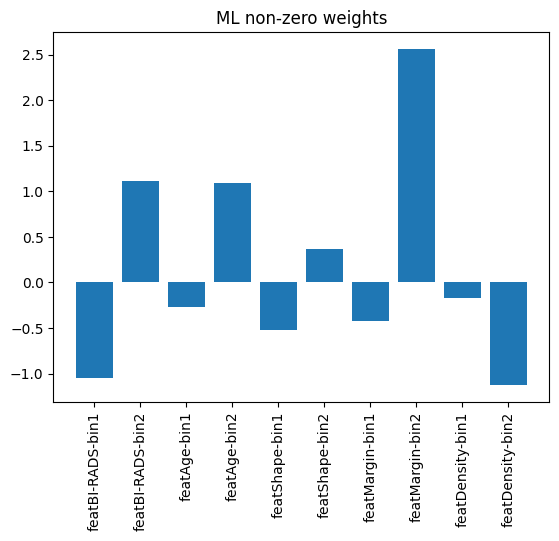

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.1927710843373494, 0.12048192771084337, 0.21686746987951808, 0.1566265060240964, 0.24096385542168675, 0.10843373493975904, 0.25301204819277107]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8072289156626506, 0.8795180722891566, 0.7831325301204819, 0.8433734939759037, 0.7590361445783133, 0.891566265060241, 0.7469879518072289]
AUCs:  [0.7970383275261324, 0.9216027874564461, 0.9465737514518002, 0.9290697674418604, 0.9340116279069769, 0.8531976744186046, 0.9311046511627906, 0.8953488372093023, 0.936046511627907, 0.8508720930232558]
mean MSE:  0.1783132530120482
mean accuracy:  0.8216867469879519
mean AUC:  0.8994866029225076
Execution time: 0.5082240104675293 seconds


In [20]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
mammo_caim_diff_ml_model, mammo_caim_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [21]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 10



discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 90.5, 94.5], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 72
  Shape: 4
  Margin: 5
  Density: 4

encoding

model
ML best parameters:  {'C': 1.1111111111111112}
ML best alpha:  0.8999999999999999
ML weights:
              Feature    Weight
0   featBI-RADS-bin1 -0.262164
1   featBI-RADS-bin2  0.000000
2   featBI-RADS-bin3  0.000000
3   featBI-RADS-bin4  2.401422
4   featBI-RADS-bin5  0.000000
..               ...   

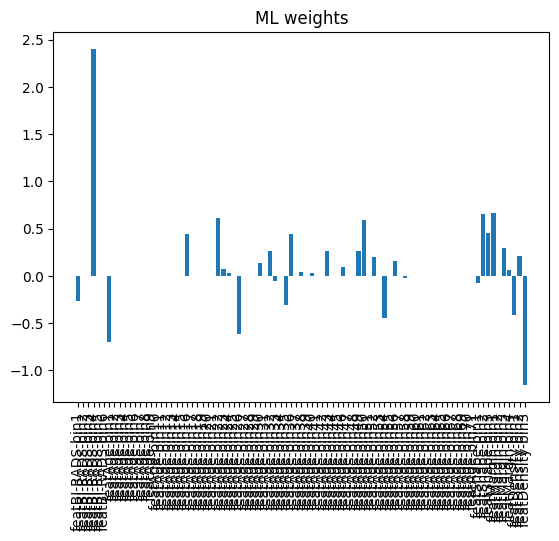

num of zero weights:  55
num of non-zero weights:  32
             Feature    Weight
0   featBI-RADS-bin1 -0.262164
3   featBI-RADS-bin4  2.401422
6       featAge-bin1 -0.698856
21     featAge-bin16  0.441374
27     featAge-bin22  0.613411
28     featAge-bin23  0.075851
29     featAge-bin24  0.034111
31     featAge-bin26 -0.619145
35     featAge-bin30  0.140914
37     featAge-bin32  0.260400
38     featAge-bin33 -0.054108
40     featAge-bin35 -0.302329
41     featAge-bin36  0.448072
43     featAge-bin38  0.046441
45     featAge-bin40  0.032520
48     featAge-bin43  0.264967
51     featAge-bin46  0.094090
54     featAge-bin49  0.265032
55     featAge-bin50  0.591080
57     featAge-bin52  0.199972
59     featAge-bin54 -0.442631
61     featAge-bin56  0.162298
63     featAge-bin58 -0.025741
77    featShape-bin1 -0.078696
78    featShape-bin2  0.651119
79    featShape-bin3  0.455426
80   featMargin-bin1  0.671076
82   featMargin-bin3  0.292097
83   featMargin-bin4  0.058593
84  featDensity-

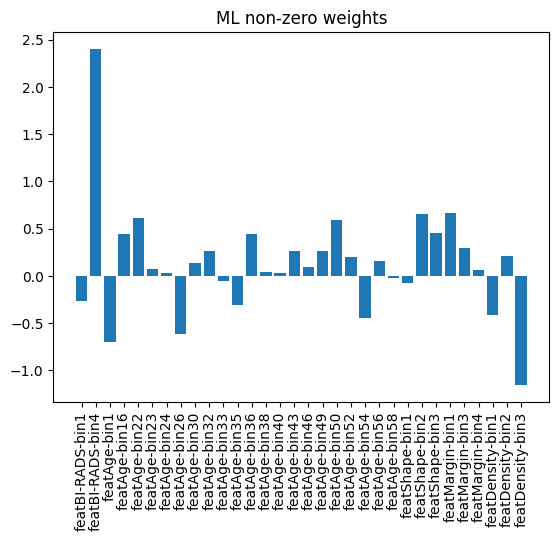

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.18072289156626506, 0.13253012048192772, 0.21686746987951808, 0.14457831325301204, 0.24096385542168675, 0.10843373493975904, 0.21686746987951808]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8192771084337349, 0.8674698795180723, 0.7831325301204819, 0.8554216867469879, 0.7590361445783133, 0.891566265060241, 0.7831325301204819]
AUCs:  [0.7894889663182346, 0.9210220673635309, 0.9488966318234612, 0.9267441860465117, 0.9334302325581395, 0.8531976744186047, 0.9299418604651162, 0.8924418604651163, 0.9412790697674418, 0.8531976744186046]
mean MSE:  0.17349397590361446
mean accuracy:  0.8265060240963855
mean AUC:  0.8989640223644761
Execution time: 7.292312145233154 seconds


In [22]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
mammo_infbins_diff_ml_model, mammo_infbins_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## aesthetic evaluation (binary version)

In [23]:
import pandas as pd
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [24]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

In [26]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
aesthetic_evaluation_binary_y.value_counts()

Subjective Evaluation
1    903
0    455
Name: count, dtype: int64


discretization thresholds
num of features:  22
Categorical []
# 0  GLOBAL CAIM  375.66257083519406
# 1  GLOBAL CAIM  420.75608164817584
# 2  GLOBAL CAIM  412.29462484745113
# 3  GLOBAL CAIM  350.72825854355256
# 4  GLOBAL CAIM  400.70175438596493
# 5  GLOBAL CAIM  371.84981422721233
# 6  GLOBAL CAIM  340.4128006872852
# 7  GLOBAL CAIM  370.1803096527949
# 8  GLOBAL CAIM  426.3106086548755
# 9  GLOBAL CAIM  414.4864713136033
# 10  GLOBAL CAIM  349.3037889148098
# 11  GLOBAL CAIM  400.7345237830506
# 12  GLOBAL CAIM  373.5171107196594
# 13  GLOBAL CAIM  355.93362935542524
# 14  GLOBAL CAIM  307.06962555886736
# 15  GLOBAL CAIM  308.950385297907
# 16  GLOBAL CAIM  314.2033120043259
# 17  GLOBAL CAIM  321.45258962170726
# 18  GLOBAL CAIM  324.76880736378587
# 19  GLOBAL CAIM  303.8292333539659
# 20  GLOBAL CAIM  306.6497453367963
# 21  GLOBAL CAIM  325.5009808188418

thresholds  {'BRA Value': [0.1023505717256087, 4.028486686743844, 25.075530326533293], 'LBC Value': [0.0004087089954772, 2.

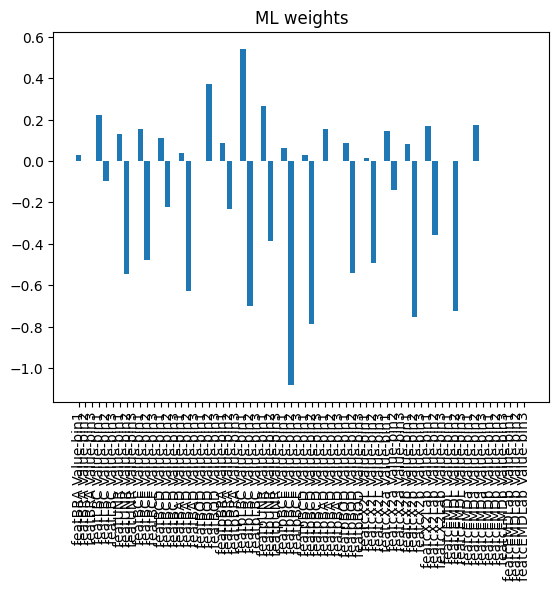

num of zero weights:  30
num of non-zero weights:  36
                  Feature    Weight
0      featBRA Value-bin1  0.027028
3      featLBC Value-bin1  0.220201
4      featLBC Value-bin2 -0.096335
6      featUNR Value-bin1  0.131125
7      featUNR Value-bin2 -0.544805
9      featBCE Value-bin1  0.155974
10     featBCE Value-bin2 -0.480146
12     featBCD Value-bin1  0.112290
13     featBCD Value-bin2 -0.222204
15     featBAD Value-bin1  0.037000
16     featBAD Value-bin2 -0.629143
19     featBOD Value-bin2  0.371477
21    featpBRA Value-bin1  0.087117
22    featpBRA Value-bin2 -0.231418
24    featpLBC Value-bin1  0.542251
25    featpLBC Value-bin2 -0.697558
27    featpUNR Value-bin1  0.263870
28    featpUNR Value-bin2 -0.384102
30    featpBCE Value-bin1  0.064484
31    featpBCE Value-bin2 -1.079897
33    featpBCD Value-bin1  0.028376
34    featpBCD Value-bin2 -0.785660
36    featpBAD Value-bin1  0.153733
39    featpBOD Value-bin1  0.086906
40    featpBOD Value-bin2 -0.540048
42    feat

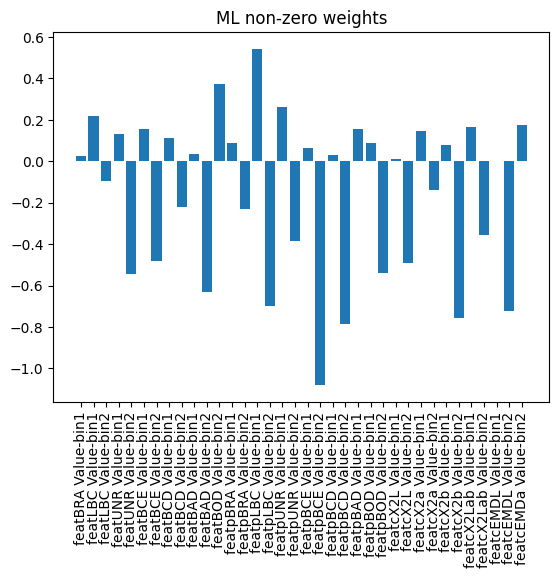

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.20588235294117646, 0.22794117647058823, 0.11029411764705882, 0.19117647058823528, 0.13970588235294118, 0.11764705882352941, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.7941176470588235, 0.7720588235294118, 0.8897058823529411, 0.8088235294117647, 0.8602941176470589, 0.8823529411764706, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8307692307692307, 0.8744810744810745, 0.8142512077294687, 0.9318840579710145, 0.8893719806763285, 0.8932367149758453, 0.9062801932367149, 0.9012345679012346, 0.82]
mean MSE:  0.1767483660130719
mean accuracy:  0.8232516339869281
mean AUC:  0.8711570077801962
Execution time: 2.361849069595337 seconds


In [27]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [28]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 36



discretization thresholds

thresholds  {'BRA Value': [0.12172490091794336, 0.1517187794102377, 0.1627276999486896, 0.17174081021731435, 0.18943093498657326, 0.19868631706202833, 0.20154489666341896, 0.20882918670067196, 0.21511673901980122, 0.23356299924095925, 0.25998993666774833, 0.26979525183184316, 0.2772706540547385, 0.284913290130897, 0.29489299511289246, 0.3047813749760474, 0.3064317925618756, 0.3093584705324939, 0.3136842659973549, 0.32186438324311417, 0.32983289494090917, 0.33359830460351236, 0.33569655002749277, 0.3385120196442457, 0.3446575366240152, 0.35401413619332134, 0.36326914384912906, 0.37758534682842426, 0.3879537697075084, 0.3949056631257663, 0.4016605202196266, 0.40327292614681354, 0.4057383237190699, 0.41532184931716165, 0.42436946542605136, 0.43301866189125515, 0.44161193606901394, 0.4444553868713025, 0.44826727689531626, 0.4507029785364637, 0.4527075558787709, 0.46334531565255604, 0.4760830037733772, 0.48283427376436205, 0.491955979289541, 0.49752310090265306, 

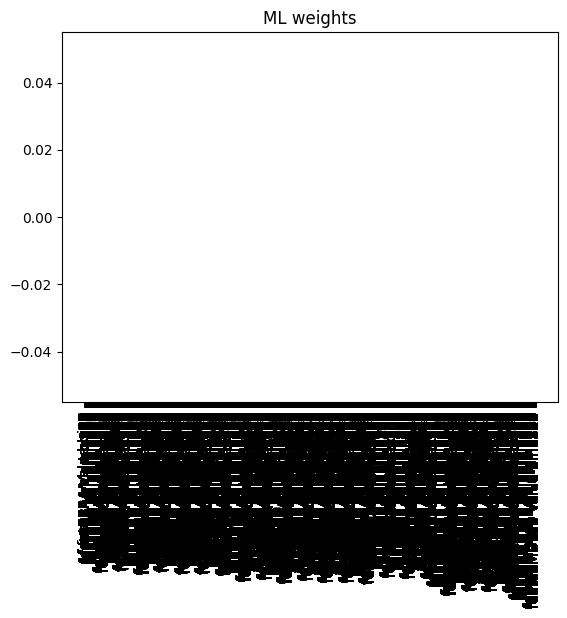

num of zero weights:  29854
num of non-zero weights:  0
Empty DataFrame
Columns: [Feature, Weight]
Index: []


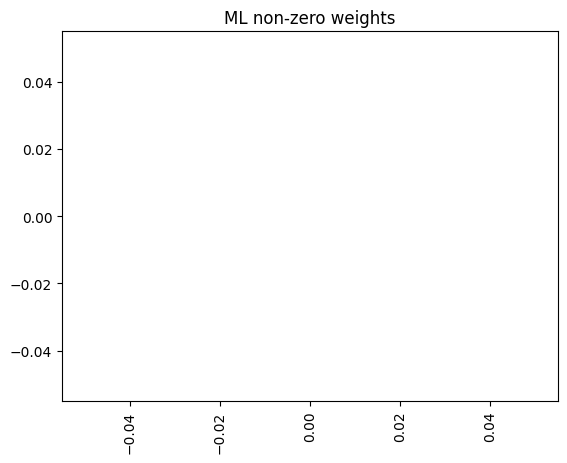

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.20588235294117646, 0.22794117647058823, 0.11029411764705882, 0.19117647058823528, 0.13970588235294118, 0.11764705882352941, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.7941176470588235, 0.7720588235294118, 0.8897058823529411, 0.8088235294117647, 0.8602941176470589, 0.8823529411764706, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8307692307692307, 0.8744810744810745, 0.8142512077294687, 0.9318840579710145, 0.8893719806763285, 0.8932367149758453, 0.9062801932367149, 0.9012345679012346, 0.82]
mean MSE:  0.1767483660130719
mean accuracy:  0.8232516339869281
mean AUC:  0.8711570077801962
Execution time: 105.01167392730713 seconds


In [29]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  22
Categorical []
# 0  GLOBAL CAIM  375.66257083519406
# 1  GLOBAL CAIM  420.75608164817584
# 2  GLOBAL CAIM  412.29462484745113
# 3  GLOBAL CAIM  350.72825854355256
# 4  GLOBAL CAIM  400.70175438596493
# 5  GLOBAL CAIM  371.84981422721233
# 6  GLOBAL CAIM  340.4128006872852
# 7  GLOBAL CAIM  370.1803096527949
# 8  GLOBAL CAIM  426.3106086548755
# 9  GLOBAL CAIM  414.4864713136033
# 10  GLOBAL CAIM  349.3037889148098
# 11  GLOBAL CAIM  400.7345237830506
# 12  GLOBAL CAIM  373.5171107196594
# 13  GLOBAL CAIM  355.93362935542524
# 14  GLOBAL CAIM  307.06962555886736
# 15  GLOBAL CAIM  308.950385297907
# 16  GLOBAL CAIM  314.2033120043259
# 17  GLOBAL CAIM  321.45258962170726
# 18  GLOBAL CAIM  324.76880736378587
# 19  GLOBAL CAIM  303.8292333539659
# 20  GLOBAL CAIM  306.6497453367963
# 21  GLOBAL CAIM  325.5009808188418

thresholds  {'BRA Value': [0.1023505717256087, 4.028486686743844, 25.075530326533293], 'LBC Value': [0.0004087089954772, 2.

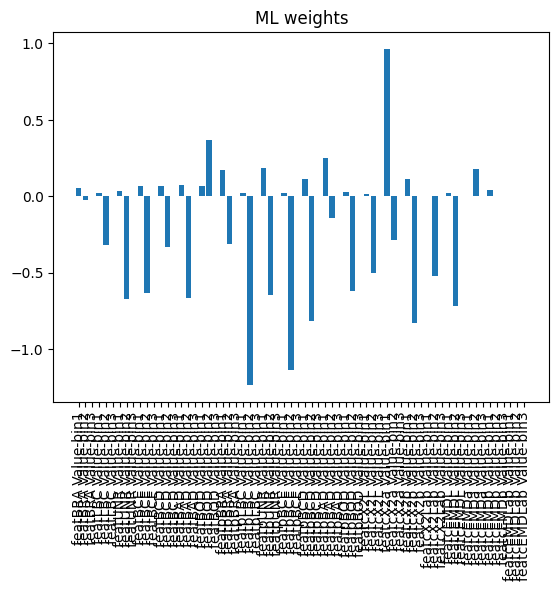

num of zero weights:  26
num of non-zero weights:  40
                   Feature    Weight
0       featBRA Value-bin1  0.051025
1       featBRA Value-bin2 -0.024816
3       featLBC Value-bin1  0.018732
4       featLBC Value-bin2 -0.317239
6       featUNR Value-bin1  0.030928
7       featUNR Value-bin2 -0.675510
9       featBCE Value-bin1  0.067572
10      featBCE Value-bin2 -0.633211
12      featBCD Value-bin1  0.066211
13      featBCD Value-bin2 -0.331698
15      featBAD Value-bin1  0.075528
16      featBAD Value-bin2 -0.668069
18      featBOD Value-bin1  0.063209
19      featBOD Value-bin2  0.370037
21     featpBRA Value-bin1  0.167700
22     featpBRA Value-bin2 -0.316146
24     featpLBC Value-bin1  0.017705
25     featpLBC Value-bin2 -1.234286
27     featpUNR Value-bin1  0.182393
28     featpUNR Value-bin2 -0.645518
30     featpBCE Value-bin1  0.018690
31     featpBCE Value-bin2 -1.139254
33     featpBCD Value-bin1  0.108704
34     featpBCD Value-bin2 -0.818527
36     featpBAD Value

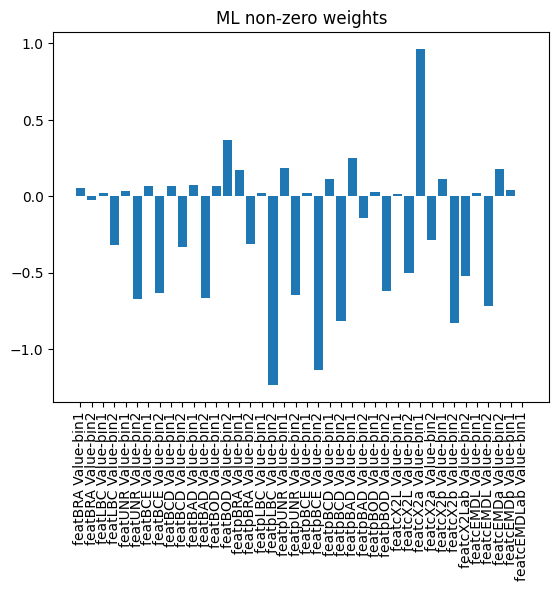

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.20588235294117646, 0.22794117647058823, 0.11029411764705882, 0.19117647058823528, 0.13970588235294118, 0.11764705882352941, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.7941176470588235, 0.7720588235294118, 0.8897058823529411, 0.8088235294117647, 0.8602941176470589, 0.8823529411764706, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8307692307692307, 0.8744810744810745, 0.8142512077294687, 0.9318840579710145, 0.8893719806763285, 0.8932367149758453, 0.9062801932367149, 0.9012345679012346, 0.82]
mean MSE:  0.1767483660130719
mean accuracy:  0.8232516339869281
mean AUC:  0.8711570077801962
Execution time: 1.9757189750671387 seconds


In [30]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [31]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 40



discretization thresholds

thresholds  {'BRA Value': [0.12172490091794336, 0.1517187794102377, 0.1627276999486896, 0.17174081021731435, 0.18943093498657326, 0.19868631706202833, 0.20154489666341896, 0.20882918670067196, 0.21511673901980122, 0.23356299924095925, 0.25998993666774833, 0.26979525183184316, 0.2772706540547385, 0.284913290130897, 0.29489299511289246, 0.3047813749760474, 0.3064317925618756, 0.3093584705324939, 0.3136842659973549, 0.32186438324311417, 0.32983289494090917, 0.33359830460351236, 0.33569655002749277, 0.3385120196442457, 0.3446575366240152, 0.35401413619332134, 0.36326914384912906, 0.37758534682842426, 0.3879537697075084, 0.3949056631257663, 0.4016605202196266, 0.40327292614681354, 0.4057383237190699, 0.41532184931716165, 0.42436946542605136, 0.43301866189125515, 0.44161193606901394, 0.4444553868713025, 0.44826727689531626, 0.4507029785364637, 0.4527075558787709, 0.46334531565255604, 0.4760830037733772, 0.48283427376436205, 0.491955979289541, 0.49752310090265306, 

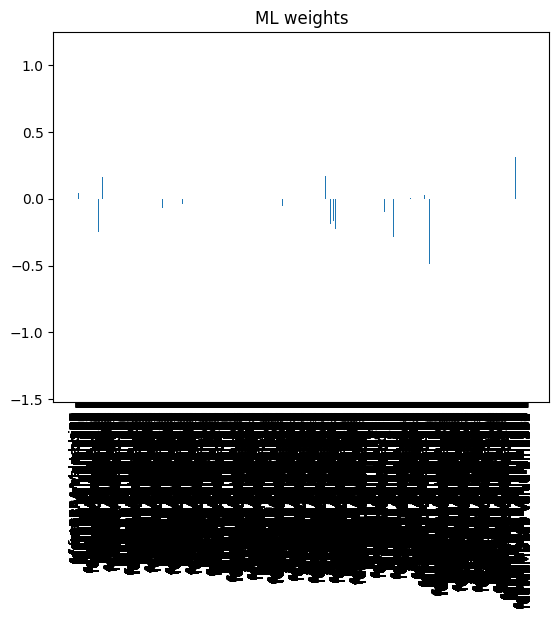

num of zero weights:  28817
num of non-zero weights:  1037
                         Feature    Weight
1             featBRA Value-bin2  0.048998
2             featBRA Value-bin3  0.023842
49           featBRA Value-bin50  0.000578
51           featBRA Value-bin52  0.000180
77           featBRA Value-bin78  0.011205
...                          ...       ...
29413   featcEMDLab Value-bin917 -0.373034
29449   featcEMDLab Value-bin953  0.063406
29524  featcEMDLab Value-bin1028 -0.014922
29725  featcEMDLab Value-bin1229 -0.063406
29726  featcEMDLab Value-bin1230 -0.046188

[1037 rows x 2 columns]


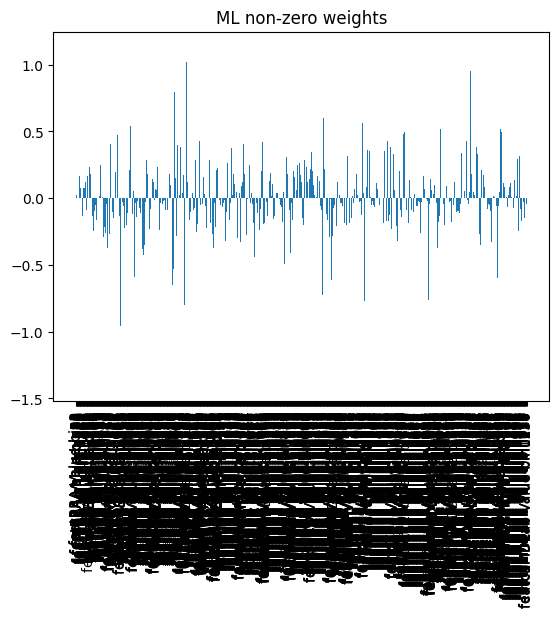

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.19852941176470587, 0.22794117647058823, 0.11764705882352941, 0.19117647058823528, 0.1323529411764706, 0.10294117647058823, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.8014705882352942, 0.7720588235294118, 0.8823529411764706, 0.8088235294117647, 0.8676470588235294, 0.8970588235294118, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8297924297924297, 0.8766788766788767, 0.813768115942029, 0.9309178743961353, 0.8910628019323672, 0.8937198067632851, 0.9067632850241546, 0.9019753086419753, 0.82]
mean MSE:  0.17454248366013073
mean accuracy:  0.8254575163398693
mean AUC:  0.8714739549232302
Execution time: 179.69551301002502 seconds


In [33]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## adult
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})
  
# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y['income'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'], rotation=0)
plt.show()

## mushroom
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets 
mushroom_y.loc[:, 'poisonous'] = mushroom_y['poisonous'].map({'p': 1, 'e': 0})
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y['poisonous'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

## telemarketing
set of possible advertisements on Internet pages

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('../datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

## sleep apnea
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])